## Visual e-reader: basic functionality

This notebook shows the core design of the "visual e-reader" application, which envisions selected passages in a story.

Given a story and one particular fragment in the story to visualize, an LLM is used to generate a scene description for the fragment. This scene description is used as the prompt for a text-to-image model in order to depict the fragment.

In [1]:
with open("llm_prompt.txt", "r") as f:
    llm_prompt_template = f.read()
print(llm_prompt_template)

You are operating inside a "visual e-reader" application that envisions highlighted passages of text as images using an AI text-to-image generation model. Your task is to consider a highlighted passage ("fragment") inside of its story context, and then write a brief "scene description" (max 100 words) that prompts the text-to-image model to visually depict the content of the fragment. The scene description should focus specifically on what's mentioned in the fragment, using the provided context for interpretation. Respond with the scene description only, without preamble.

Highlighted Passage: {fragment}
Context: {story}
Scene Description:


In [2]:
story = ("Lisa has a beautiful sapphire ring. "
"She always takes it off to wash her hands. "
"One afternoon, she noticed it was missing from her finger! "
"Lisa searched everywhere she had been that day. "
"She was elated when she found it on the bathroom floor!")

In [11]:
llm_prompt = llm_prompt_template.format(
    story=story,
    fragment="Lisa has a beautiful sapphire ring.")

In [12]:
import replicate, os

client = replicate.client.Client(api_token=os.environ["REPLICATE_API_KEY"])
scene_description = "".join(client.run(
    "meta/meta-llama-3.1-405b-instruct",
    input={"prompt": llm_prompt}))
print(scene_description)

A close-up of Lisa's hand, with the beautiful sapphire ring prominently displayed on her finger, sparkling in the light, set against a soft, neutral background to emphasize the ring's vibrant blue color.


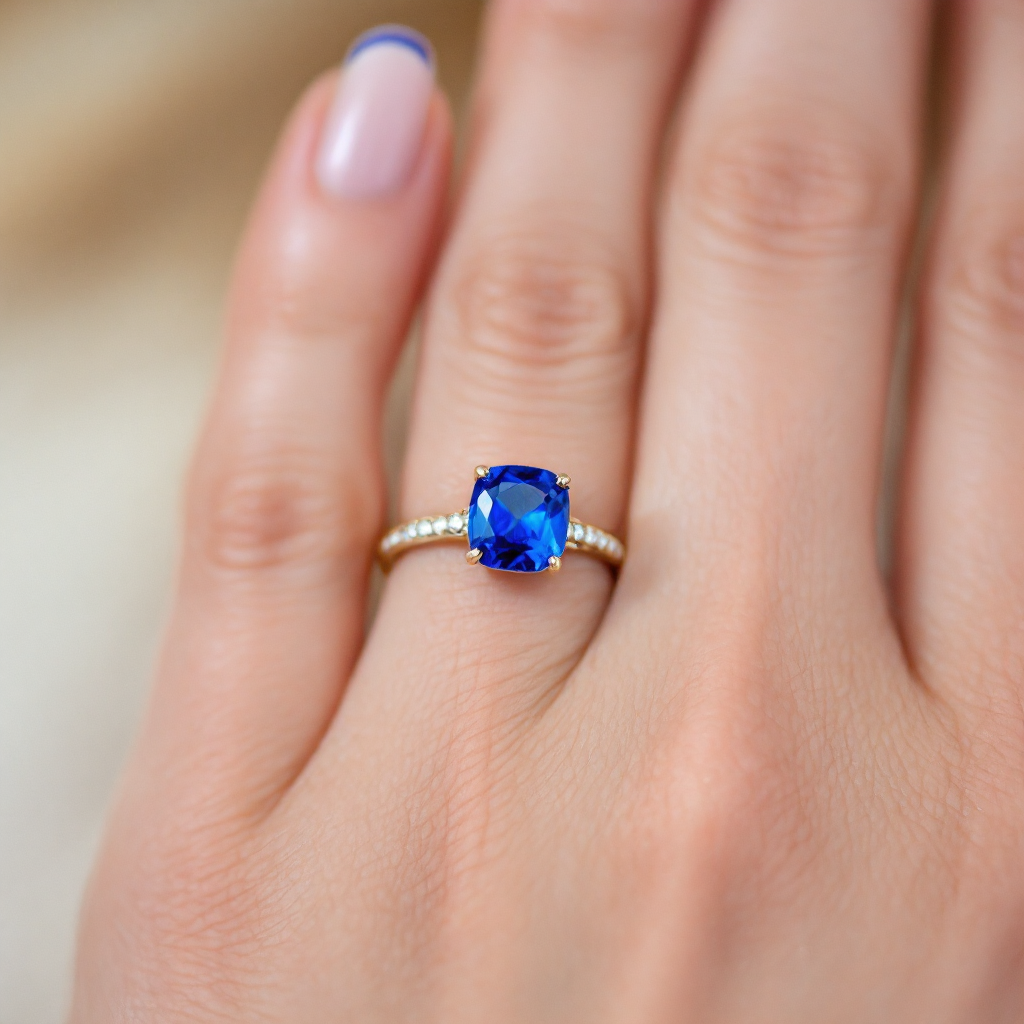

In [16]:
from IPython.display import Image

url = client.run("black-forest-labs/flux-1.1-pro",
                 input={"prompt": scene_description,
                        "output_format": "png"})
Image(url, width=300)

In [ ]:
story = ("Lisa has a beautiful sapphire ring. "
"She always takes it off to wash her hands. "
"One afternoon, she noticed it was missing from her finger! "
"Lisa searched everywhere she had been that day. "
"She was elated when she found it on the bathroom floor!")

In [18]:
llm_prompt = llm_prompt_template.format(
    story=story,
    fragment="She was elated when she found it on the bathroom floor!")

In [19]:
scene_description = "".join(client.run(
    "meta/meta-llama-3.1-405b-instruct",
    input={"prompt": llm_prompt}))
print(scene_description)

A young woman, overjoyed, bends down to pick up a sapphire ring from the white tile floor of a bathroom. Her hand reaches out, and her fingers close around the ring as a relieved smile spreads across her face. Soft, natural light enters through a nearby window, illuminating the scene. The bathroom's neutral colors and simple fixtures provide a calm background for the woman's triumphant moment. Her eyes shine with happiness as she gazes at the recovered ring.


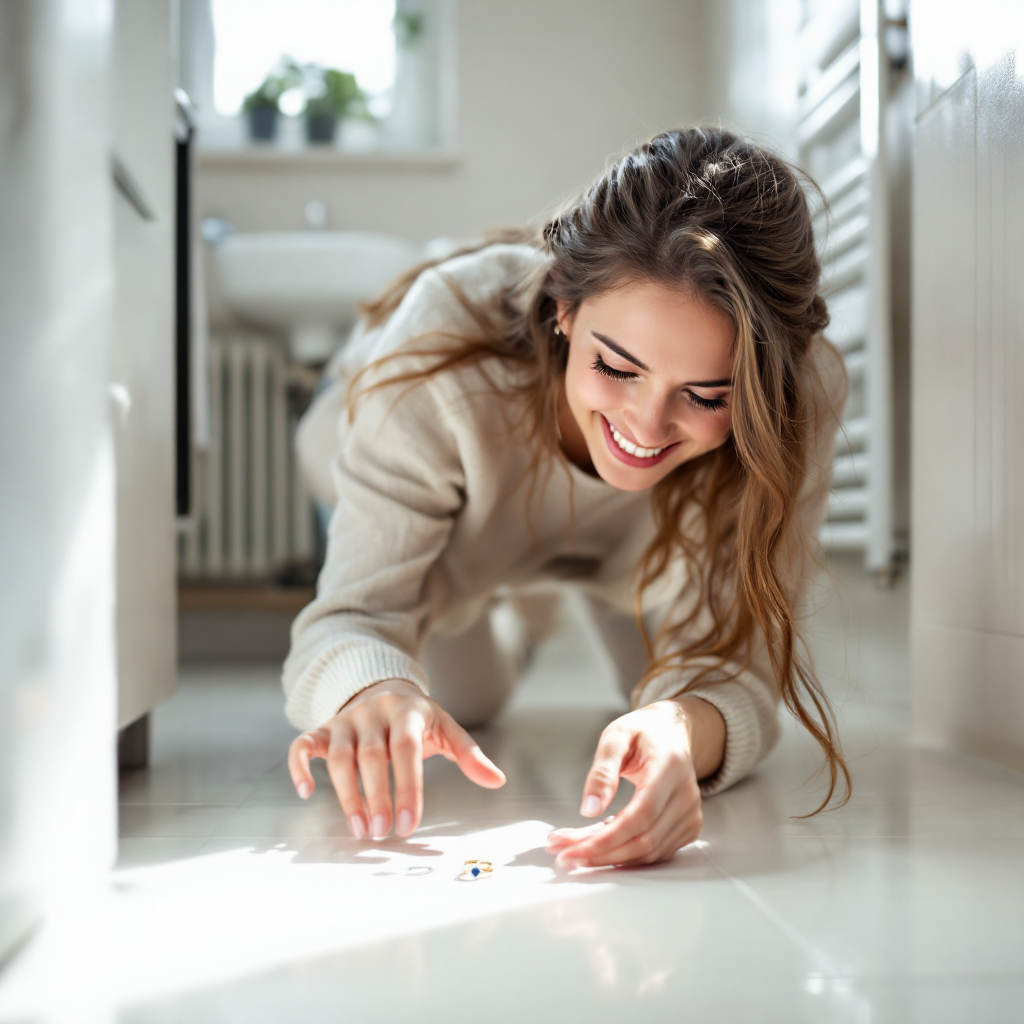

In [25]:
url = client.run("black-forest-labs/flux-1.1-pro",
                 input={"prompt": scene_description,
                        "output_format": "png"})
Image(url, width=300)